In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('feature_importance/merged_feature_importance.csv', index_col=0)
df = df.dropna(axis=1, how='any')
df

,ml_algorithm,forecasting_algorithm,run,feature_importance_method,value__has_duplicate_max,value__mean_second_derivative_central,value__median,value__length,value__standard_deviation,value__skewness,...,value__energy_ratio_by_chunks__num_segments_10__segment_focus_5,value__energy_ratio_by_chunks__num_segments_10__segment_focus_6,value__ratio_beyond_r_sigma__r_0.5,value__ratio_beyond_r_sigma__r_1,value__ratio_beyond_r_sigma__r_1.5,value__ratio_beyond_r_sigma__r_2.5,value__ratio_beyond_r_sigma__r_3,value__ratio_beyond_r_sigma__r_6,value__lempel_ziv_complexity__bins_2,value__permutation_entropy__dimension_3__tau_1
0,M4XGBRegressor,sNaive,1,shap,0.000431,0.005533,0.023753,0.006384,0.010115,0.003775,...,0.000949,0.001852,0.000643,0.001789,0.000743,0.002991,0.001091,0.000414,0.002170,0.003736
1,M4RandomForestRegressor,Theta,8,shap,0.000347,0.001800,0.011902,0.003088,0.004329,0.000698,...,0.001627,0.002094,0.000511,0.000495,0.000725,0.000965,0.000497,0.000309,0.001018,0.002485
2,M4XGBRegressor,Com,4,shap,0.000291,0.004878,0.017071,0.004394,0.010111,0.003379,...,0.001531,0.002283,0.000903,0.001284,0.000873,0.001063,0.001008,0.000303,0.001560,0.005813
3,M4XGBRegressor,Naive2,10,shap,0.000375,0.006024,0.019757,0.008130,0.012516,0.002340,...,0.001049,0.002488,0.000642,0.001046,0.001093,0.000624,0.000661,0.000348,0.003636,0.003841
4,M4XGBRegressor,ARIMA,5,shap,0.000315,0.005245,0.016926,0.003113,0.010095,0.003238,...,0.001376,0.002382,0.001086,0.000994,0.000613,0.001100,0.001116,0.000364,0.001932,0.004737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11760,M4KerasNetRegressionModel,245,10,shap,0.001118,0.002134,0.038423,0.005418,0.046333,0.005980,...,0.002048,0.002429,0.001749,0.001729,0.001799,0.003011,0.001421,0.000998,0.005938,0.009781
11761,M4DummyMeanRegression,Damped,7,shap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11762,M4DummyMeanRegression,Naive2,7,shap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11763,M4KerasNetRegressionModel,237,8,shap,0.001054,0.002133,0.037445,0.009100,0.046570,0.005739,...,0.002675,0.002696,0.002705,0.001724,0.001636,0.002586,0.001500,0.000661,0.007869,0.009387


In [3]:
static_columns = ['feature_importance_method', 'forecasting_algorithm', 'ml_algorithm', 'run']
feature_columns = set(df.columns) - set(static_columns)
feature_columns = sorted(list(feature_columns))

In [4]:
figures_directory = 'figures'
show_top_n_features = 10

In [5]:
df

,ml_algorithm,forecasting_algorithm,run,feature_importance_method,value__has_duplicate_max,value__mean_second_derivative_central,value__median,value__length,value__standard_deviation,value__skewness,...,value__energy_ratio_by_chunks__num_segments_10__segment_focus_5,value__energy_ratio_by_chunks__num_segments_10__segment_focus_6,value__ratio_beyond_r_sigma__r_0.5,value__ratio_beyond_r_sigma__r_1,value__ratio_beyond_r_sigma__r_1.5,value__ratio_beyond_r_sigma__r_2.5,value__ratio_beyond_r_sigma__r_3,value__ratio_beyond_r_sigma__r_6,value__lempel_ziv_complexity__bins_2,value__permutation_entropy__dimension_3__tau_1
0,M4XGBRegressor,sNaive,1,shap,0.000431,0.005533,0.023753,0.006384,0.010115,0.003775,...,0.000949,0.001852,0.000643,0.001789,0.000743,0.002991,0.001091,0.000414,0.002170,0.003736
1,M4RandomForestRegressor,Theta,8,shap,0.000347,0.001800,0.011902,0.003088,0.004329,0.000698,...,0.001627,0.002094,0.000511,0.000495,0.000725,0.000965,0.000497,0.000309,0.001018,0.002485
2,M4XGBRegressor,Com,4,shap,0.000291,0.004878,0.017071,0.004394,0.010111,0.003379,...,0.001531,0.002283,0.000903,0.001284,0.000873,0.001063,0.001008,0.000303,0.001560,0.005813
3,M4XGBRegressor,Naive2,10,shap,0.000375,0.006024,0.019757,0.008130,0.012516,0.002340,...,0.001049,0.002488,0.000642,0.001046,0.001093,0.000624,0.000661,0.000348,0.003636,0.003841
4,M4XGBRegressor,ARIMA,5,shap,0.000315,0.005245,0.016926,0.003113,0.010095,0.003238,...,0.001376,0.002382,0.001086,0.000994,0.000613,0.001100,0.001116,0.000364,0.001932,0.004737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11760,M4KerasNetRegressionModel,245,10,shap,0.001118,0.002134,0.038423,0.005418,0.046333,0.005980,...,0.002048,0.002429,0.001749,0.001729,0.001799,0.003011,0.001421,0.000998,0.005938,0.009781
11761,M4DummyMeanRegression,Damped,7,shap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11762,M4DummyMeanRegression,Naive2,7,shap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11763,M4KerasNetRegressionModel,237,8,shap,0.001054,0.002133,0.037445,0.009100,0.046570,0.005739,...,0.002675,0.002696,0.002705,0.001724,0.001636,0.002586,0.001500,0.000661,0.007869,0.009387


In [6]:
def get_best_features(df, return_importance=False):
    from collections import defaultdict
    features_ranking = defaultdict(lambda: 0)

    for irow in range(len(df)):
        s = df[feature_columns].iloc[irow]
        i=0
        for fi, fn in sorted(list(zip(s,s.index))):
            features_ranking[fn] += i
            i+=1

    best_features_list = list(features_ranking.items())
    best_features_list.sort(key=lambda x:x[1], reverse=True)
    if return_importance:
        return best_features_list
    else:
        best_features = [x for x, y in best_features_list]
        return best_features

best_features_all = get_best_features(df, return_importance=True)

In [7]:
def ml_fe_options(df):
    from collections import namedtuple
    MLFePair = namedtuple('MLFePair', 'ml fe')
    v = df[['ml_algorithm', 'feature_importance_method']].value_counts().reset_index().values.tolist()
    return [MLFePair(x[0], x[1]) for x in v]

importance_options = ml_fe_options(df)
importance_options

[MLFePair(ml='M4DummyMeanRegression', fe='permutation'),
 MLFePair(ml='M4RandomForestRegressor', fe='permutation'),
 MLFePair(ml='M4XGBRegressor', fe='permutation'),
 MLFePair(ml='M4KerasNetRegressionModel', fe='permutation'),
 MLFePair(ml='M4RandomForestSingleOutputRegressor', fe='permutation'),
 MLFePair(ml='M4RandomForestSingleOutputRegressor', fe='randomforest'),
 MLFePair(ml='M4XGBRegressor', fe='xgboost-cover'),
 MLFePair(ml='M4XGBRegressor', fe='xgboost-gain'),
 MLFePair(ml='M4XGBRegressor', fe='xgboost-total_cover'),
 MLFePair(ml='M4XGBRegressor', fe='xgboost-total_gain'),
 MLFePair(ml='M4XGBRegressor', fe='xgboost-weight'),
 MLFePair(ml='M4DummyMeanRegression', fe='shap'),
 MLFePair(ml='M4KerasNetRegressionModel', fe='shap'),
 MLFePair(ml='M4RandomForestRegressor', fe='shap'),
 MLFePair(ml='M4XGBRegressor', fe='shap')]

In [8]:
#importance_options[0].ml
feo = importance_options[8]
print(feo)
best_features_0 = get_best_features(df[(df['ml_algorithm']==feo.ml) & (df['feature_importance_method']==feo.fe)], return_importance=True)
feo = importance_options[7]
print(feo)
best_features_1 = get_best_features(df[(df['ml_algorithm']==feo.ml) & (df['feature_importance_method']==feo.fe)], return_importance=True)
feo = importance_options[6]
print(feo)
best_features_2 = get_best_features(df[(df['ml_algorithm']==feo.ml) & (df['feature_importance_method']==feo.fe)], return_importance=True)

MLFePair(ml='M4XGBRegressor', fe='xgboost-total_cover')
MLFePair(ml='M4XGBRegressor', fe='xgboost-gain')
MLFePair(ml='M4XGBRegressor', fe='xgboost-cover')


In [9]:
best_features_0 = {f:v for f, v in best_features_0}
best_features_1 = {f:v for f, v in best_features_1}
best_features_2 = {f:v for f, v in best_features_2}

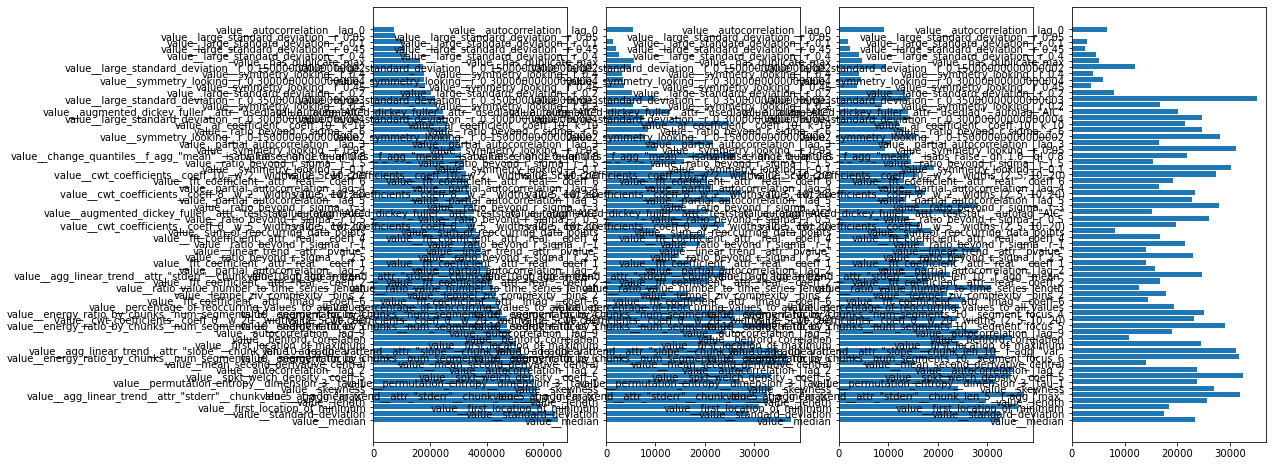

In [10]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(16, 8))

feature_list = [x[0] for x in best_features_all]
ranking_list = [x[1] for x in best_features_all]
axes[0].barh(feature_list, ranking_list)

ranking_list_0 = [best_features_0[f] for f in feature_list]
axes[1].barh(feature_list, ranking_list_0)

ranking_list_1 = [best_features_1[f] for f in feature_list]
axes[2].barh(feature_list, ranking_list_1)

ranking_list_2 = [best_features_2[f] for f in feature_list]
axes[3].barh(feature_list, ranking_list_2)

plt.show()

In [11]:
df

,ml_algorithm,forecasting_algorithm,run,feature_importance_method,value__has_duplicate_max,value__mean_second_derivative_central,value__median,value__length,value__standard_deviation,value__skewness,...,value__energy_ratio_by_chunks__num_segments_10__segment_focus_5,value__energy_ratio_by_chunks__num_segments_10__segment_focus_6,value__ratio_beyond_r_sigma__r_0.5,value__ratio_beyond_r_sigma__r_1,value__ratio_beyond_r_sigma__r_1.5,value__ratio_beyond_r_sigma__r_2.5,value__ratio_beyond_r_sigma__r_3,value__ratio_beyond_r_sigma__r_6,value__lempel_ziv_complexity__bins_2,value__permutation_entropy__dimension_3__tau_1
0,M4XGBRegressor,sNaive,1,shap,0.000431,0.005533,0.023753,0.006384,0.010115,0.003775,...,0.000949,0.001852,0.000643,0.001789,0.000743,0.002991,0.001091,0.000414,0.002170,0.003736
1,M4RandomForestRegressor,Theta,8,shap,0.000347,0.001800,0.011902,0.003088,0.004329,0.000698,...,0.001627,0.002094,0.000511,0.000495,0.000725,0.000965,0.000497,0.000309,0.001018,0.002485
2,M4XGBRegressor,Com,4,shap,0.000291,0.004878,0.017071,0.004394,0.010111,0.003379,...,0.001531,0.002283,0.000903,0.001284,0.000873,0.001063,0.001008,0.000303,0.001560,0.005813
3,M4XGBRegressor,Naive2,10,shap,0.000375,0.006024,0.019757,0.008130,0.012516,0.002340,...,0.001049,0.002488,0.000642,0.001046,0.001093,0.000624,0.000661,0.000348,0.003636,0.003841
4,M4XGBRegressor,ARIMA,5,shap,0.000315,0.005245,0.016926,0.003113,0.010095,0.003238,...,0.001376,0.002382,0.001086,0.000994,0.000613,0.001100,0.001116,0.000364,0.001932,0.004737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11760,M4KerasNetRegressionModel,245,10,shap,0.001118,0.002134,0.038423,0.005418,0.046333,0.005980,...,0.002048,0.002429,0.001749,0.001729,0.001799,0.003011,0.001421,0.000998,0.005938,0.009781
11761,M4DummyMeanRegression,Damped,7,shap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11762,M4DummyMeanRegression,Naive2,7,shap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11763,M4KerasNetRegressionModel,237,8,shap,0.001054,0.002133,0.037445,0.009100,0.046570,0.005739,...,0.002675,0.002696,0.002705,0.001724,0.001636,0.002586,0.001500,0.000661,0.007869,0.009387


In [12]:
#best_features

In [13]:
#df['feature_importance_method'].unique()

In [14]:
#mdf = df.melt(id_vars=['feature_importance_method', 'forecasting_algorithm', 'ml_algorithm', 'run'], var_name="feature", value_name="importance")

In [15]:
#mdf